In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In C:\ANACONDA\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ANACONDA\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ANACONDA\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ANACONDA\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ANACONDA\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

In [2]:
df = pd.read_csv("D:/Datasets/Loan/train_original.csv")
df.drop("Loan_ID", axis=1, inplace=True)
df.dropna(how="any", inplace=True)
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
153,Male,Yes,2,Not Graduate,No,2281,0.0,113.0,360.0,1.0,Rural,N
180,Male,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0.0,Urban,N
361,Male,Yes,2,Graduate,No,5000,3667.0,236.0,360.0,1.0,Semiurban,Y
122,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
349,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,Y


In [3]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [4]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"].astype(str))
df["Married"] = le.fit_transform(df["Married"].astype(str))
df["Dependents"] = le.fit_transform(df["Dependents"].astype(str))
df["Self_Employed"] = le.fit_transform(df["Self_Employed"].astype(str))
df["Education"] = le.fit_transform(df["Education"].astype(str))
df["Property_Area"] = le.fit_transform(df["Property_Area"].astype(str))
df["Loan_Status"] = le.fit_transform(df["Loan_Status"].astype(str))

In [5]:
rf_model = RandomForestClassifier().fit(df.drop("Loan_Status",axis=1),df["Loan_Status"])

C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


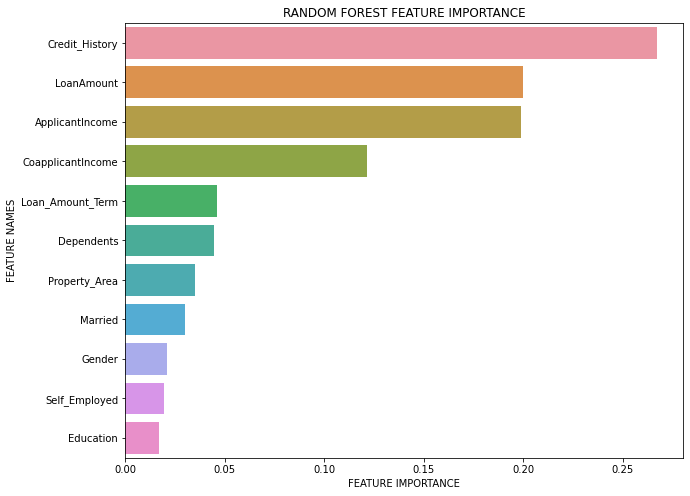

In [6]:
plot_feature_importance(rf_model.feature_importances_,df.drop("Loan_Status",axis=1).columns,'RANDOM FOREST')